# Skip-Gram Negative Sampling(NGNS; 네거티브 샘플링을 이용한 Word2Vec)

    20뉴스그룹 데이터 사용

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

    - 하나의 sample에 최소 단어 2개 이상 (중심단어 및 주변 단어의 관계가 성립하기 때문)

    1. 데이터 로드

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers','fotters', 'quotes'))
documents = dataset.data

print(len(documents))

11314


    2. 데이터 전처리
    
     : 불필요한 token, 제거, 소문자화를 통한 정규화

In [3]:
new_df = pd.DataFrame({'document':documents})

# 특문 제거
new_df['clean_doc'] = new_df['document'].str.replace('[^a-zA-Z]', '')

# 길이가 3 이하인 단어 제거
new_df['clean_doc'] = new_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# 전체 단어에 대한 소문자 변환
new_df['clean_doc'] = new_df['clean_doc'].apply(lambda x: x.lower())

In [4]:
# null 값 확인

new_df.isnull().values.any()

False

In [5]:
# empty 값 확인

new_df.replace('', float('NaN'), inplace=True)
new_df.isnull().values.any()

True

In [6]:
# empty값 제거

new_df.dropna(inplace=True)
print(len(new_df))

11289


In [7]:
# 불용어 제거

stop_words = stopwords.words('english')
tokenized_doc = new_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenzied_doc = tokenized_doc.to_list()

In [9]:
# 단어가 1개 이하인 sample 제거

drop_train = [index for index, sentence in enumerate(tokenzied_doc) if len(sentence)<=1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print(len(tokenized_doc))


11273


    3. 단어 집합 생성 및 정수 인코딩

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

In [11]:
word2idx = tokenizer.word_index
idx2word = {val: key for key, val in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [12]:
encoded[:2]

[[43,
  51,
  1012,
  154,
  17487,
  1764,
  576,
  279,
  831,
  12206,
  19618,
  26533,
  32969,
  279,
  831,
  70414,
  831,
  1150,
  1180,
  2040,
  909,
  32970,
  959,
  769,
  22579,
  279,
  831,
  184,
  154,
  1803,
  128,
  279,
  22580,
  19618,
  7231,
  6232,
  76,
  70415,
  6,
  32,
  170,
  651,
  674,
  32971,
  7232,
  26534,
  2041,
  901,
  19619,
  1219,
  9552,
  368,
  1151,
  15696,
  720,
  58,
  156,
  4105,
  7791,
  1947,
  437,
  52,
  304,
  4867,
  10094,
  2695,
  43745],
 [1286,
  417,
  3,
  56,
  5803,
  164,
  119,
  470,
  94,
  19620,
  18,
  66,
  5131,
  3056,
  70416,
  1103,
  422,
  43746,
  9063,
  884,
  41,
  9064,
  320,
  12207,
  884,
  3688,
  6449,
  519,
  18,
  97,
  5132,
  10095,
  145,
  1503,
  121,
  158,
  5617,
  70417,
  70418,
  19621,
  70419,
  12207,
  973,
  70420,
  70421,
  12208,
  19622,
  19623,
  117,
  11388,
  17488,
  17489,
  691,
  192,
  10,
  17490,
  19624,
  3406,
  19625,
  19626]]

In [13]:
# 단어 집합의 크기

vocab_size = len(word2idx) +1
vocab_size

198867

    4. 네거티브 샘플링을 통한 데이터셋 구추
    
    - 토큰화 ,정제, 정규화, 불용어 제거, 정수 인코딩의 전처리 후에 네거티브 샘플링 수행
    - keras에서 제공하는 skipgrams 사용함

In [14]:
from tensorflow.keras.preprocessing.sequence import skipgrams

In [15]:
# negative sampling

skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]
skip_grams

[([[368, 97351],
   [70414, 26533],
   [19618, 162234],
   [51, 108635],
   [4867, 58],
   [437, 2695],
   [26533, 279],
   [15696, 29521],
   [19619, 129055],
   [170, 76],
   [1012, 154],
   [2040, 21397],
   [128, 138293],
   [58, 128751],
   [2041, 1151],
   [1151, 26534],
   [4105, 1219],
   [154, 17487],
   [1180, 23410],
   [1803, 191312],
   [1151, 81430],
   [32971, 82519],
   [32, 128],
   [128, 71001],
   [15696, 1151],
   [674, 22580],
   [1151, 9552],
   [1012, 26533],
   [43745, 81203],
   [831, 959],
   [674, 2041],
   [7232, 15696],
   [2695, 156],
   [22580, 105191],
   [26534, 70325],
   [4867, 10094],
   [26534, 17996],
   [909, 22579],
   [1150, 135516],
   [154, 22579],
   [43745, 166048],
   [70415, 44127],
   [959, 22579],
   [12206, 576],
   [184, 169929],
   [1764, 154],
   [32, 47404],
   [304, 18499],
   [959, 166477],
   [831, 18137],
   [831, 22579],
   [70415, 901],
   [154, 194655],
   [674, 1151],
   [2041, 66388],
   [1151, 108202],
   [15696, 132605],


    5. 결과 확인

In [16]:
# 첫 번째 sample만 확인

pairs, labels = skip_grams[0][0], skip_grams[0][1]

In [17]:
for i in range(5):
    print(f" {idx2word[pairs[i][0]]}, {pairs[i][0]}, {idx2word[pairs[i][1]]}, {pairs[i][1]}, {labels[i]}")

 israeli, 368, oa68/*!p@>$^'tz$, 97351, 0
 pro-israeli, 70414, reputation., 26533, 1
 israels, 19618, dividians., 162234, 0
 sure, 51, fsset@bach.lerc.nasa.gov, 108635, 0
 treating, 4867, government, 58, 1


In [18]:
len(skip_grams)

10

In [19]:
# 첫 번째 뉴스 그룹 샘플에 대해 생긴 pairs 와 labels의 개수

print(len(pairs))
print(len(labels))

2460
2460


In [20]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

# Skip-gram With Negative Sampling(SGNS) 구현

In [21]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

    - hyperparameter embedding vector dimension = 100, 2개의 layer 추가

In [22]:
embedding_dim = 100

# Center word embedding table
w_inputs = Input(shape=(1,), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# Cotext word embedding table

c_inputs = Input(shape=(1,), dtype='int32')
context_embedding =Embedding(vocab_size, embedding_dim)(c_inputs)

     - 각 embedding table은 center word와 context word에 대한 embedding table
     - 각 word는 embedding table을 거쳐서 dot을 수행하고 내적은 1,0을 예측하기 위해 sigmoid 함수를 activation function으로 활용

In [23]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1,1))(dot_product)
output = Activation('sigmoid')(dot_product)

In [24]:
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       19886700    ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       19886700    ['input_2[0][0]']                
                                                                                              

In [25]:
import matplotlib.pyplot as plt

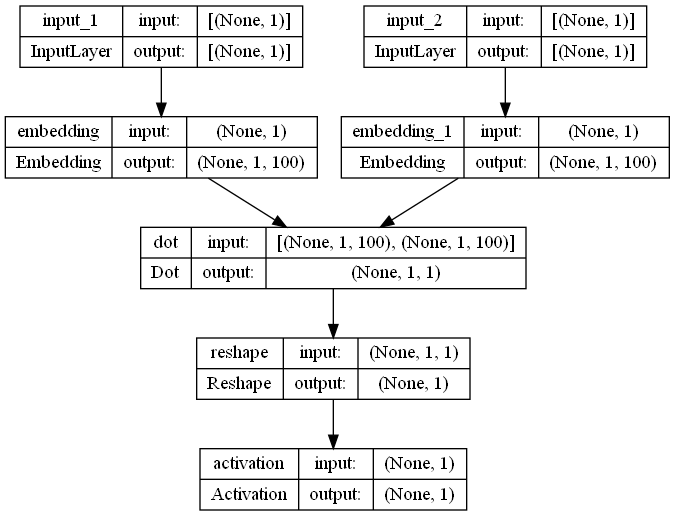

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [ ]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 5747.728142306209


     모델 결과를 확인하기 위해 학습된 embedding vector를 vector.txt에 저장


In [ ]:
import gensim

f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [ ]:
w2v.most_similar(positive=['soliders'])

In [ ]:
w2v.most_similar(positive=['doctor'])